In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
dataTest = pd.read_csv("subject/Test_knight.csv")
dataTest.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
2,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216
3,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.1288,0.2977,0.07259
4,15.34,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,...,18.07,19.08,125.10,980.9,0.1390,0.5954,0.6305,0.2393,0.4667,0.09946


In [3]:
# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataTest)

In [4]:
# 3. Aplicar PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

In [9]:
# Calcular la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Variances (Percentages):")
print(explained_variance)

Variances (Percentages):
[4.53253971e-01 2.09180774e-01 8.98822270e-02 6.35456071e-02
 5.40254979e-02 4.10450567e-02 1.97058608e-02 1.24816861e-02
 9.95809672e-03 8.64212577e-03 8.42695732e-03 7.06119944e-03
 6.13493429e-03 4.60574690e-03 2.59257793e-03 2.27328782e-03
 1.39400810e-03 1.23466826e-03 1.02320488e-03 7.11349563e-04
 6.71589335e-04 6.01097009e-04 5.35755733e-04 3.50677133e-04
 2.32290887e-04 2.17898380e-04 1.69364003e-04 2.28195958e-05
 1.56752088e-05 3.99498818e-06]


In [12]:
# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance)
# Convertir la varianza acumulada a porcentaje
pct_explained_variance = cumulative_variance * 100
print("Cumulative variances (Percentage)")
print(pct_explained_variance)

Cumulative variances (Percentage)
[ 45.32539707  66.24347452  75.23169722  81.58625793  86.98880771
  91.09331338  93.06389946  94.31206807  95.30787775  96.17209032
  97.01478606  97.720906    98.33439943  98.79497412  99.05423191
  99.28156069  99.4209615   99.54442833  99.64674882  99.71788377
  99.78504271  99.84515241  99.89872798  99.93379569  99.95702478
  99.97881462  99.99575102  99.99803298  99.9996005  100.        ]


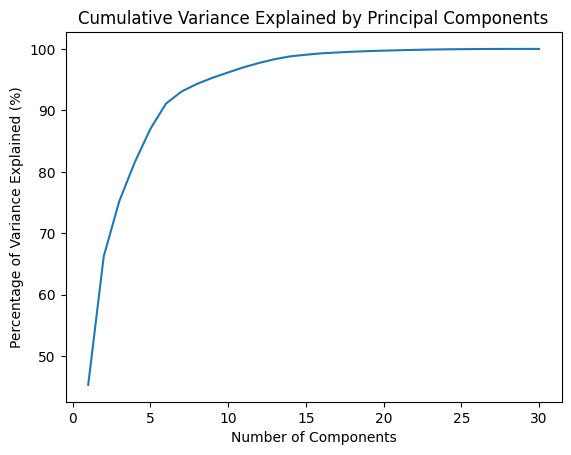

In [13]:
# Graficar la varianza explicada acumulada
plt.plot(range(1, len(explained_variance) + 1), pct_explained_variance, linestyle='-')

# Etiquetas del gráfico
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained (%)')
plt.title('Cumulative Variance Explained by Principal Components')

plt.show()